## 1. Import and warehouse data: 
• Import all the given datasets and explore shape and size.

In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import json as js
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv(r"C:\Users\ADMIN\AI-ML\7.Unsupervised Learning\Project week\Part1 - Car name.csv")
df2 = pd.read_json(r"C:\Users\ADMIN\AI-ML\7.Unsupervised Learning\Project week\Part1 - Car-Attributes.json")

In [3]:
df1.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [4]:
df2.head()

,acc,cyl,disp,hp,mpg,origin,wt,yr
0,12.0,8,307.0,130,18.0,1,3504,70
1,11.5,8,350.0,165,15.0,1,3693,70
2,11.0,8,318.0,150,18.0,1,3436,70
3,12.0,8,304.0,150,16.0,1,3433,70
4,10.5,8,302.0,140,17.0,1,3449,70


In [5]:
row, column = df1.shape
print('The dataset contains', row, 'rows and', column, 'columns')

The dataset contains 398 rows and 1 columns


In [6]:
df1.size

398

In [7]:
row, column = df2.shape
print('The dataset contains', row, 'rows and', column, 'columns')

The dataset contains 398 rows and 8 columns


In [8]:
df2.size

3184

## • Merge all datasets onto one and explore final shape and size.

In [9]:
# convert dataframe to csv file
df2.to_csv("CSV.csv",index=False)
  
# load the resultant csv file
df3 = pd.read_csv("CSV.csv")
  
# and view the data
print(df3.head())

    acc  cyl   disp   hp   mpg  origin    wt  yr
0  12.0    8  307.0  130  18.0       1  3504  70
1  11.5    8  350.0  165  15.0       1  3693  70
2  11.0    8  318.0  150  18.0       1  3436  70
3  12.0    8  304.0  150  16.0       1  3433  70
4  10.5    8  302.0  140  17.0       1  3449  70


In [10]:
df = df1.join(df3, lsuffix="_left", rsuffix="_right")

In [11]:
df.head()

,car_name,acc,cyl,disp,hp,mpg,origin,wt,yr
0,chevrolet chevelle malibu,12.0,8,307.0,130,18.0,1,3504,70
1,buick skylark 320,11.5,8,350.0,165,15.0,1,3693,70
2,plymouth satellite,11.0,8,318.0,150,18.0,1,3436,70
3,amc rebel sst,12.0,8,304.0,150,16.0,1,3433,70
4,ford torino,10.5,8,302.0,140,17.0,1,3449,70


In [12]:
row, column = df.shape
print('The final/merged dataset contains', row, 'rows and', column, 'columns')

The final/merged dataset contains 398 rows and 9 columns


In [13]:
df.size

3582

### • Export the final dataset and store it on local machine in .csv, .xlsx and .json format for future use.

In [14]:
df.to_csv('new_file.csv', index=False)
df.to_excel('new_file.xlsx', index = False)
df.to_json('new_file.json', orient = 'split', index = 'true')

## • Import the data from above steps into python.

In [15]:
data = pd.read_csv(r"new_file.csv")

In [16]:
data.head()

,car_name,acc,cyl,disp,hp,mpg,origin,wt,yr
0,chevrolet chevelle malibu,12.0,8,307.0,130,18.0,1,3504,70
1,buick skylark 320,11.5,8,350.0,165,15.0,1,3693,70
2,plymouth satellite,11.0,8,318.0,150,18.0,1,3436,70
3,amc rebel sst,12.0,8,304.0,150,16.0,1,3433,70
4,ford torino,10.5,8,302.0,140,17.0,1,3449,70


## 2. Data cleansing: 
• Missing/incorrect value treatment

In [17]:
data.dtypes

car_name     object
acc         float64
cyl           int64
disp        float64
hp           object
mpg         float64
origin        int64
wt            int64
yr            int64
dtype: object

In [18]:
# as unsupervised learning deals with only numerical data so dropping the caterogical data 
data = data.drop('car_name', axis=1)

In [19]:
# replacing the categorical var with actual values
data['origin'] = data['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
data.head()

,acc,cyl,disp,hp,mpg,origin,wt,yr
0,12.0,8,307.0,130,18.0,america,3504,70
1,11.5,8,350.0,165,15.0,america,3693,70
2,11.0,8,318.0,150,18.0,america,3436,70
3,12.0,8,304.0,150,16.0,america,3433,70
4,10.5,8,302.0,140,17.0,america,3449,70


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
acc       398 non-null float64
cyl       398 non-null int64
disp      398 non-null float64
hp        398 non-null object
mpg       398 non-null float64
origin    398 non-null object
wt        398 non-null int64
yr        398 non-null int64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


## • Drop attribute/s if required using relevant functional knowledge

In [21]:
temp = pd.DataFrame(data.hp.str.isdigit()) 
# if the string is made of digits store True else False

#print isDigit = False!
temp[temp['hp'] == False] 

,hp
32,False
126,False
330,False
336,False
354,False
374,False


There are various ways to handle missing values. Drop the rows, replace missing values with median values etc. of the 398 rows 6 have NAN in the hp column. We could drop those 6 rows - which might not be a good idea under all situations. Here, we will replace them with their median values. First replace '?' with NaN and then replace NaN with median

In [22]:
data = data.replace('?', np.nan)
data[temp['hp'] == False] 

,acc,cyl,disp,hp,mpg,origin,wt,yr
32,19.0,4,98.0,NaN,25.0,america,2046,71
126,17.0,6,200.0,NaN,21.0,america,2875,74
330,17.3,4,85.0,NaN,40.9,europe,1835,80
336,14.3,4,140.0,NaN,23.6,america,2905,80
354,15.8,4,100.0,NaN,34.5,europe,2320,81
374,20.5,4,151.0,NaN,23.0,america,3035,82


In [23]:
#instead of dropping the rows, lets replace the missing values with median value. 
data.median()

acc       15.5
cyl        4.0
disp     148.5
hp        93.5
mpg       23.0
wt      2803.5
yr        76.0
dtype: float64

## • Perform another kind of corrections/treatment on the data.

In [24]:
data['hp'] = data['hp'].astype('float64')

In [25]:
#replace hp with median
data['hp'].fillna((data['hp'].median()), inplace=True)

In [26]:
data.isnull().sum()

acc       0
cyl       0
disp      0
hp        0
mpg       0
origin    0
wt        0
yr        0
dtype: int64

The data set has no missing values 

In [27]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


## 3. Data analysis & visualisation: 
• Perform detailed statistical analysis on the data.

In [28]:
#creating mpg_level attribute using the 25% and 75% of mpg values( <  17 as low, > 17 and <29 as medium, > 29 as high  )
data['mpg_level'] = data['mpg'].apply(lambda x: 'low' if x<17 else 'high' if x>29 else 'medium')
data.head(2)

,acc,cyl,disp,hp,mpg,origin,wt,yr,mpg_level
0,12.0,8,307.0,130.0,18.0,america,3504,70,medium
1,11.5,8,350.0,165.0,15.0,america,3693,70,low


In [29]:
#categorical variable
data_cat = data.iloc[:,[1,7,5,8]]
data_cat.head()

,cyl,yr,origin,mpg_level
0,8,70,america,medium
1,8,70,america,low
2,8,70,america,medium
3,8,70,america,low
4,8,70,america,medium


In [30]:
#numeric variables
data_num=data.drop(['cyl','yr','origin','mpg_level'],axis=1)
data_num.head()

,acc,disp,hp,mpg,wt
0,12.0,307.0,130.0,18.0,3504
1,11.5,350.0,165.0,15.0,3693
2,11.0,318.0,150.0,18.0,3436
3,12.0,304.0,150.0,16.0,3433
4,10.5,302.0,140.0,17.0,3449


## • Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

### Univariate

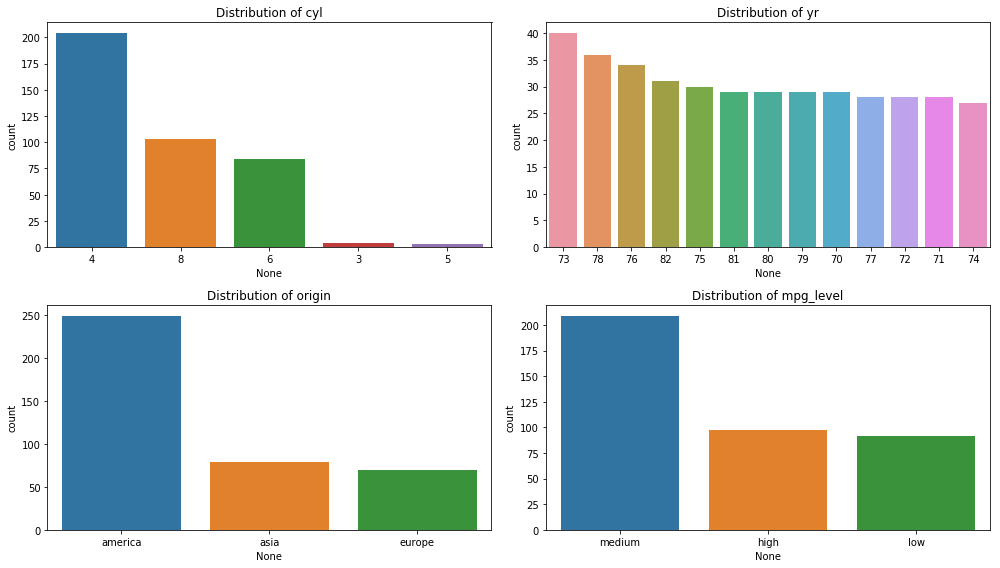

In [31]:
#plotting categorical variables
fig = plt.figure(1, (14, 8))

for i,j in enumerate(data_cat.columns):
    ax = plt.subplot(2,2,i+1)
    sns.countplot(data_cat[j], order=data_cat[j].value_counts().index)
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {j}')
    plt.tight_layout()

plt.show()

observation: American 4 cylinder cars produced in 1973 with medium mpg level seem to dominate the dateset

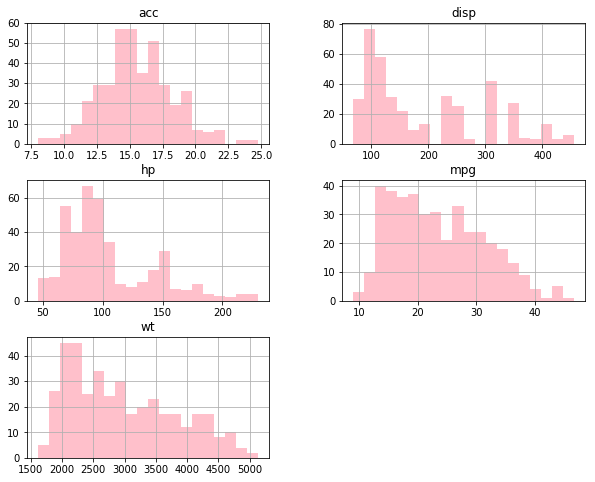

In [32]:
#plot histograms
data_num.hist(bins =20, figsize = (10, 8), color = 'pink')
plt.show()

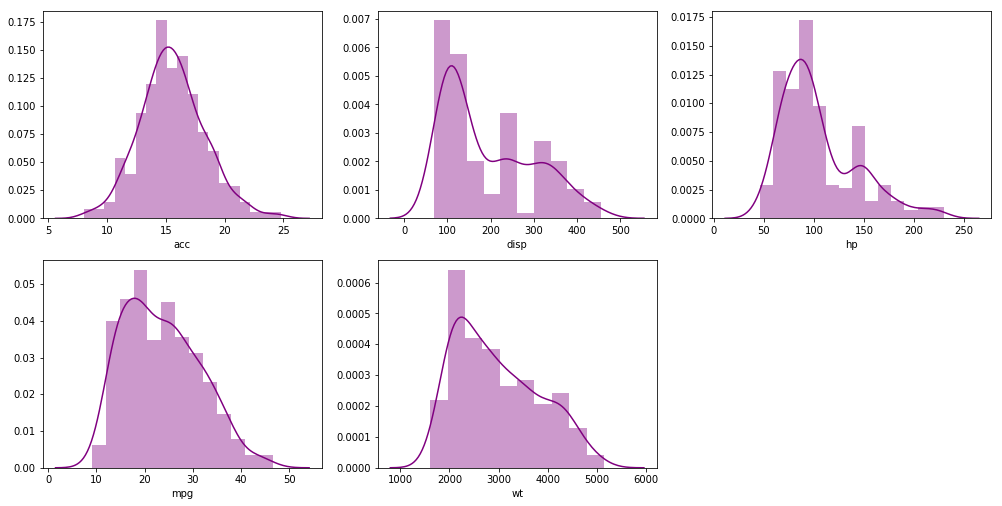

In [33]:
#plot density
plt.figure(figsize=(17, 13))
col = 1
for i in data_num.columns:
    plt.subplot(3, 3, col)
    sns.distplot(data_num[i], color = 'purple')
    col += 1 

observation : Displacement and Horsepower seem to be skewed to the right 

## BiVariate Plots
A bivariate analysis among the different independent variables can be done using scatter matrix plot. Seaborn libs create a dashboard reflecting useful information about the dimensions. The result can be stored as a .png file.

Text(0,0.5,'mpg')

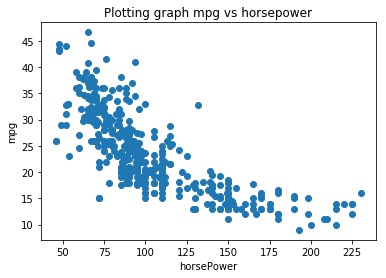

In [34]:
plt.scatter(data.hp, data.mpg, );
plt.title("Plotting graph mpg vs horsepower")
plt.xlabel('horsePower')
plt.ylabel('mpg')

Text(0,0.5,'mpg')

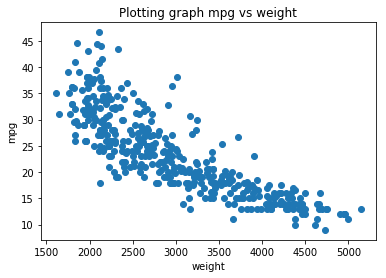

In [35]:
plt.scatter(data.wt, data.mpg, );
plt.title("Plotting graph mpg vs weight")
plt.xlabel('weight')
plt.ylabel('mpg')

We can get a better analysis by seeing multivatiate analysis

### MultVariate

In [36]:
data.head(2)

,acc,cyl,disp,hp,mpg,origin,wt,yr,mpg_level
0,12.0,8,307.0,130.0,18.0,america,3504,70,medium
1,11.5,8,350.0,165.0,15.0,america,3693,70,low


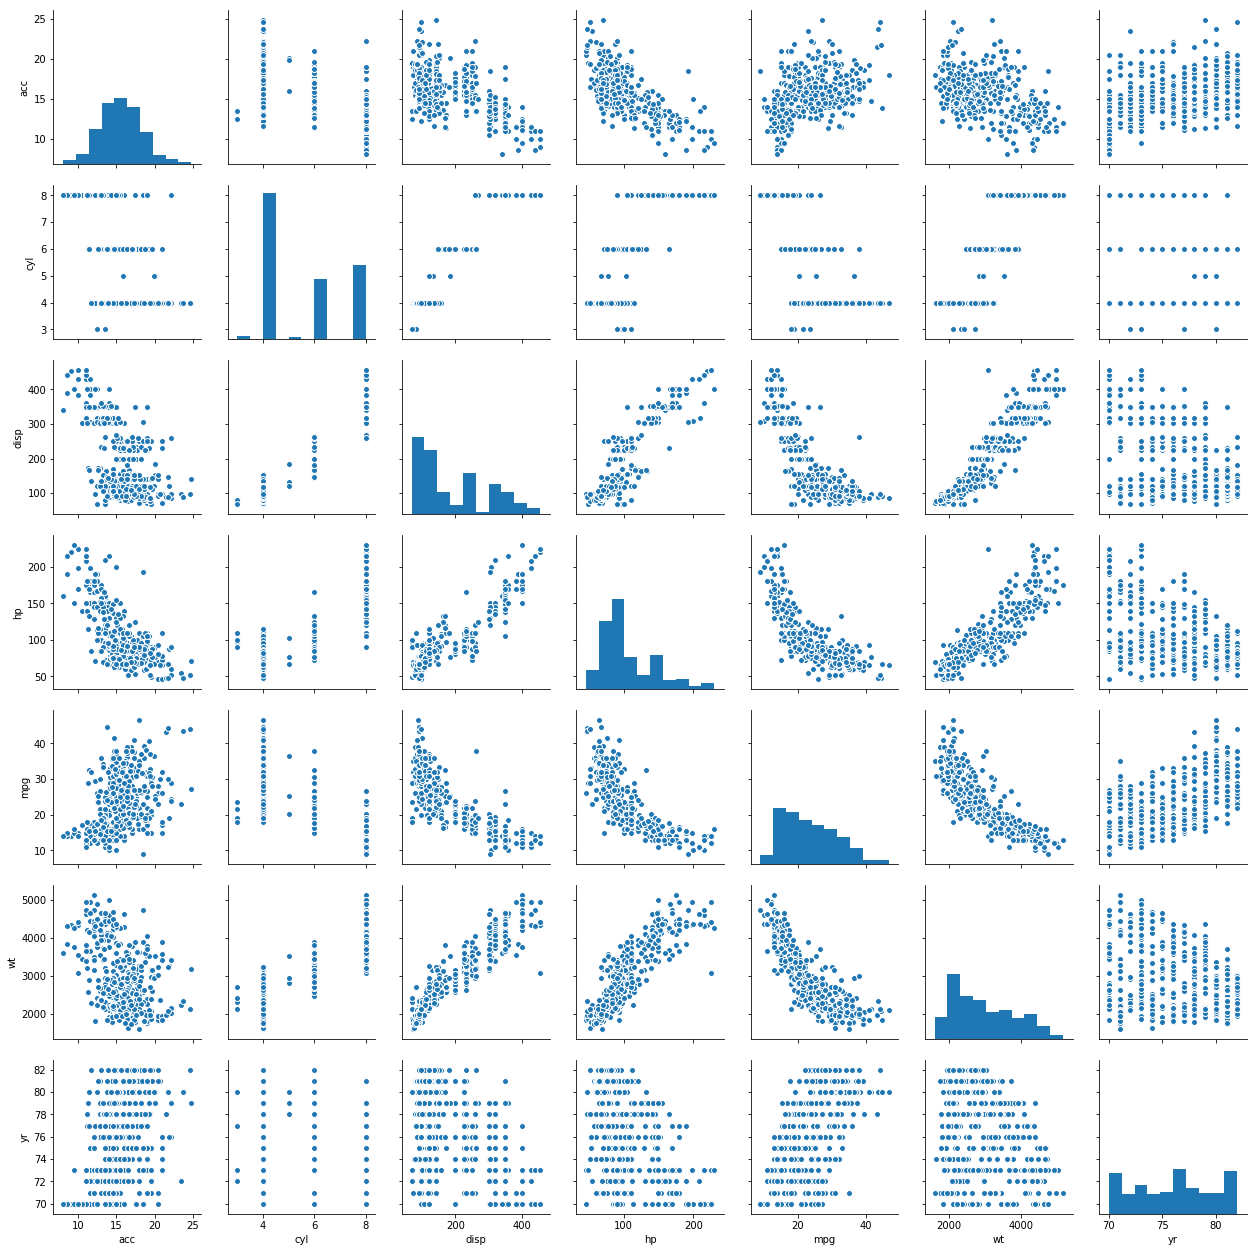

In [37]:
sns.pairplot(data, diag_kind='hist');   # to plot density curve instead of histogram on the diag

observation : there appears to be a linear relationship between variables (+ve and -ve)

In [38]:
data2=data.drop(['origin', 'mpg_level'],axis=1)

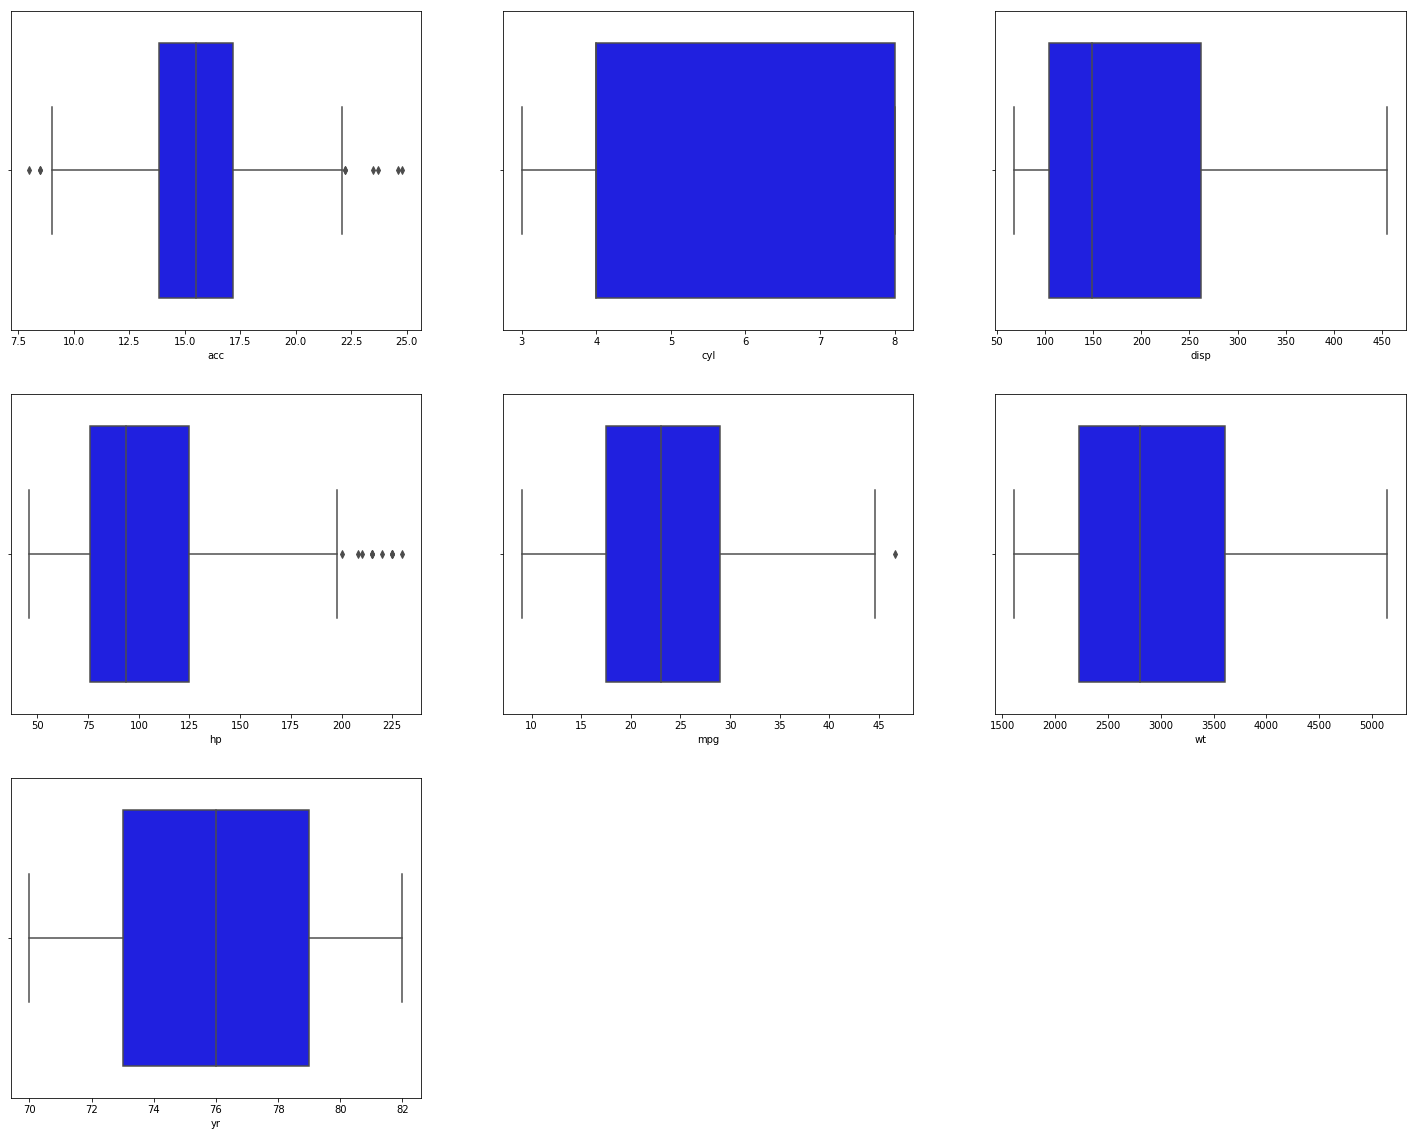

In [39]:
#checking of outliers
plt.figure(figsize=(25, 20))
col = 1
for i in data2.columns:
    plt.subplot(3, 3, col)
    sns.boxplot(data2[i],color='blue')
    col += 1

observation :many outliers are present for column 'hp' and 'acc' 

In [40]:
#replacing outliers with IQR (Q1 and Q3 +-1.5*IQR)
from scipy import stats 
IQR1 = stats.iqr(data2['hp'], interpolation = 'midpoint')
IQR2 = stats.iqr(data2['acc'], interpolation = 'midpoint')

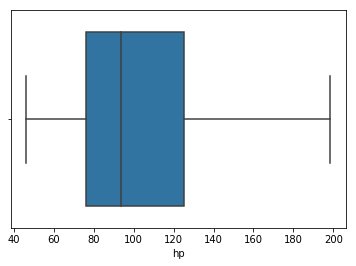

In [41]:
#Horsepower after imputing outliers
Q3 = data2['hp'].quantile(0.75)
data2['hp'] = np.where(data2["hp"] >(Q3+1.5*IQR1), 198.5,data2['hp'])
sns.boxplot(data2['hp']);

observation : outlier is removed for horsepower

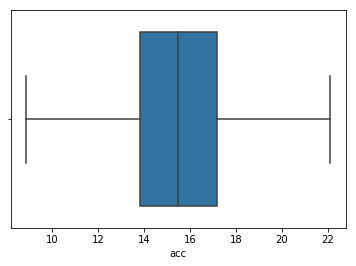

In [42]:
#accelaration after imputing outliers
Q1 = data2['acc'].quantile(0.25)
Q31 = data2['acc'].quantile(0.75)
data2['acc'] = np.where(data2["acc"] >(Q31+1.5*IQR2),22.10 ,data2['acc'])
data2['acc'] = np.where(data2["acc"] <(Q1-1.5*IQR2),(Q1-1.5*IQR2),data2['acc'])
sns.boxplot(data2['acc']);

observation : outliers are removed from acc 

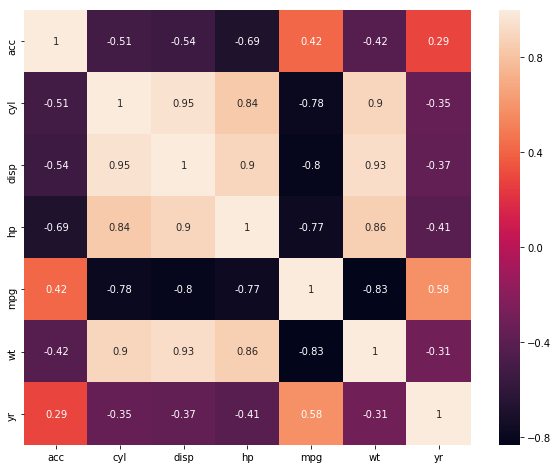

In [43]:
#checking for correlation
plt.figure(figsize=(10,8))
corr=data.corr()
sns.heatmap(corr,annot=True);

observation : Except Year, most of the variable are correlated with each other

In [44]:
#create dummy varibale for mpg_level and origin and creating a seperate datset for k-means and heirarchical clustering
data = pd.get_dummies(data, columns=['origin'])
data = pd.get_dummies(data, columns=['mpg_level'])
data.head()
carH=data.copy()
carK=data.copy()

## 4. Machine learning:
• Use K Means and Hierarchical clustering to find out the optimal number of clusters in the data.

In [45]:
data2.head(2)

,acc,cyl,disp,hp,mpg,wt,yr
0,12.0,8,307.0,130.0,18.0,3504,70
1,11.5,8,350.0,165.0,15.0,3693,70


### Hirerachical Clustering

In [46]:
from scipy.stats import zscore

XScaled=data2.apply(zscore)

XScaled.head()

,acc,cyl,disp,hp,mpg,wt,yr
0,-1.322760,1.498191,1.090604,0.713692,-0.706439,0.630870,-1.627426
1,-1.509008,1.498191,1.503514,1.666741,-1.090751,0.854333,-1.627426
2,-1.695257,1.498191,1.196232,1.258291,-0.706439,0.550470,-1.627426
3,-1.322760,1.498191,1.061796,1.258291,-0.962647,0.546923,-1.627426
4,-1.881505,1.498191,1.042591,0.985992,-0.834543,0.565841,-1.627426


In [47]:
from sklearn.cluster import AgglomerativeClustering 
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [48]:
model.fit(XScaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=3,
            pooling_func=<function mean at 0x000001263E609488>)

In [49]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist 
#Pairwise distribution between data points

In [50]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
Z = linkage(XScaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(XScaled))

c

0.7886748007688226

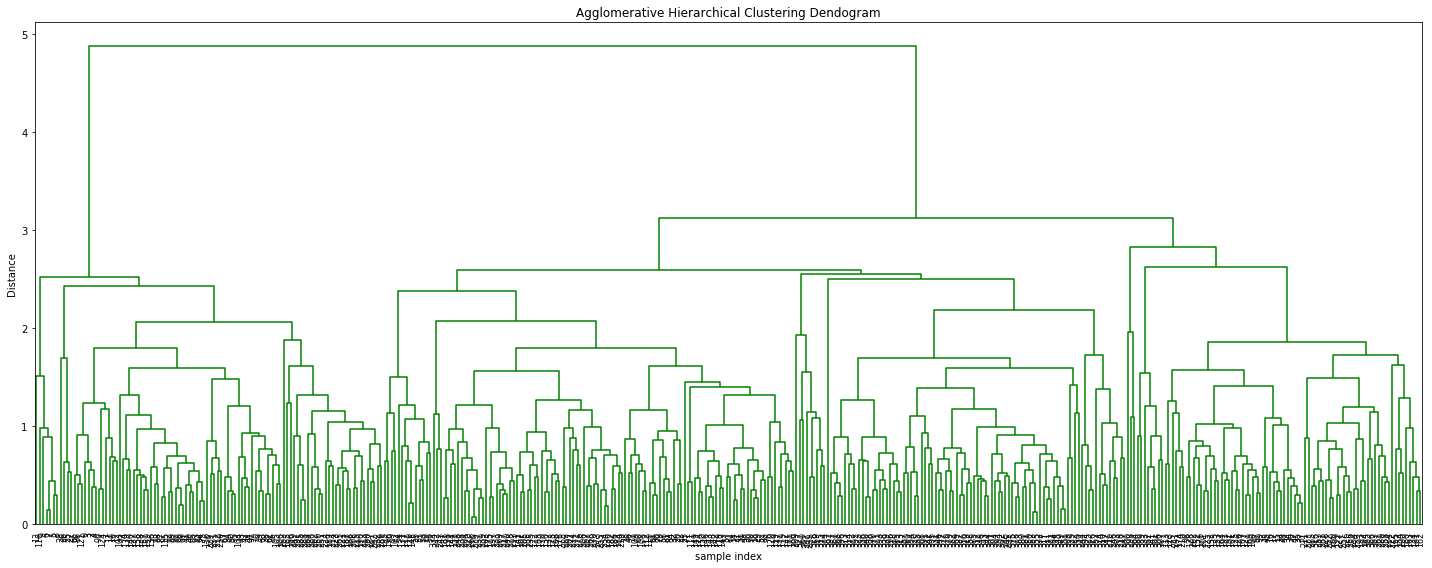

In [51]:
plt.figure(figsize=(20, 8))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [52]:
Z = linkage(XScaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(XScaled))

c

0.74527198906408

In [53]:
Z = linkage(XScaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(XScaled))

c

0.7769466936110183

we can observe that the best linkage is observed in case of average link i.e:80%

Appers to be to much of a visual clutter, we'll go ahead and cut down the dendrogram to give us 2 clusters/groups

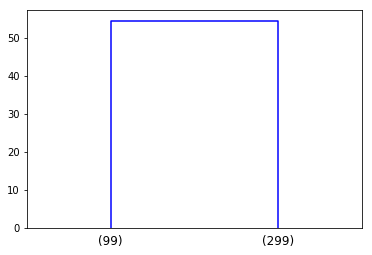

In [54]:
# dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  
    p=2,  
)
plt.show()

In [55]:
#vieweing the clusters formed
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, 2, criterion='maxclust')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,

In [56]:
#attaching the clusters formed to the scales data
XScaled['clusters_H'] = clusters
XScaled.head(2)

,acc,cyl,disp,hp,mpg,wt,yr,clusters_H
0,-1.322760,1.498191,1.090604,0.713692,-0.706439,0.630870,-1.627426,1
1,-1.509008,1.498191,1.503514,1.666741,-1.090751,0.854333,-1.627426,1


In [57]:
#vieweing the distribution of clusters
XScaled.clusters_H.value_counts().sort_index()

1     99
2    299
Name: clusters_H, dtype: int64

In [58]:
#attaching the clusters formed to the original data
data2['clusters_H']=clusters
carH['clusters_H']=clusters
data2.head()

,acc,cyl,disp,hp,mpg,wt,yr,clusters_H
0,12.0,8,307.0,130.0,18.0,3504,70,1
1,11.5,8,350.0,165.0,15.0,3693,70,1
2,11.0,8,318.0,150.0,18.0,3436,70,1
3,12.0,8,304.0,150.0,16.0,3433,70,1
4,10.5,8,302.0,140.0,17.0,3449,70,1


In [59]:
#create a new data set named Hclus
Hclus=data2
Hclus.head(2)

,acc,cyl,disp,hp,mpg,wt,yr,clusters_H
0,12.0,8,307.0,130.0,18.0,3504,70,1
1,11.5,8,350.0,165.0,15.0,3693,70,1


In [60]:
#aggregating the numerical variable with the clusters formed with the mean
aggdata=data2.groupby('clusters_H').mean()
aggdata['Freq']=data2.clusters_H.value_counts().sort_index()
aggdata

,acc,cyl,disp,hp,mpg,wt,yr,Freq
clusters_H,,,,,,,,
1,12.711364,8.00000,346.626263,158.287879,14.653535,4128.393939,73.69697,99
2,16.491304,4.61204,142.700669,85.745819,26.448495,2587.016722,76.77592,299


observation : Clearly shows two disting group with a difference in average between the clusters and variables

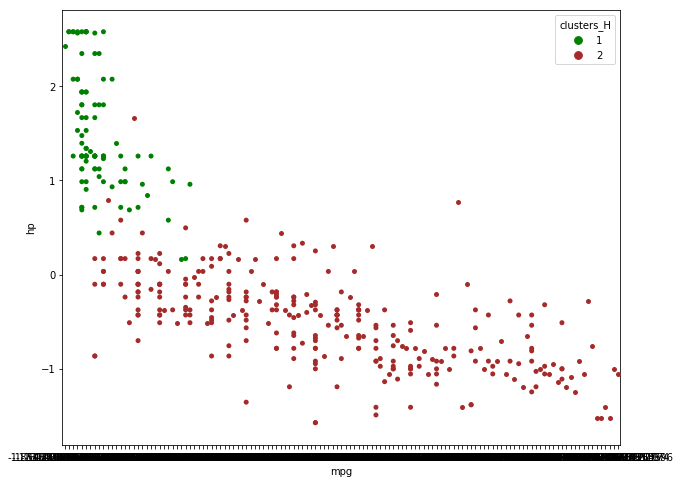

In [61]:
#plotting the clusters formed
plt.figure(figsize=(10, 8))
sns.stripplot(x="mpg", y="hp", hue="clusters_H",
              data=XScaled, 
                    palette=['green','brown']);

### K means 

##### Group Data into similar clusters
Now, we will use K-Means clustering to group data based on their attribute.
First, we need to determine the optimal number of groups.
For that we conduct the knee test to see where the knee happens.

In [62]:
data2.pop('clusters_H')
data2.head(2)

,acc,cyl,disp,hp,mpg,wt,yr
0,12.0,8,307.0,130.0,18.0,3504,70
1,11.5,8,350.0,165.0,15.0,3693,70


In [63]:
Xscaled=data2.apply(zscore)

Xscaled.head()

,acc,cyl,disp,hp,mpg,wt,yr
0,-1.322760,1.498191,1.090604,0.713692,-0.706439,0.630870,-1.627426
1,-1.509008,1.498191,1.503514,1.666741,-1.090751,0.854333,-1.627426
2,-1.695257,1.498191,1.196232,1.258291,-0.706439,0.550470,-1.627426
3,-1.322760,1.498191,1.061796,1.258291,-0.962647,0.546923,-1.627426
4,-1.881505,1.498191,1.042591,0.985992,-0.834543,0.565841,-1.627426


Text(0.5,1,'Selecting k with the Elbow Method')

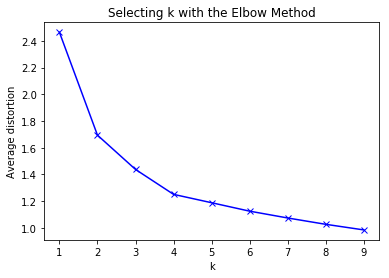

In [64]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(Xscaled)
    prediction=model.predict(Xscaled)
    meanDistortions.append(sum(np.min(cdist(Xscaled, model.cluster_centers_, 'euclidean'), axis=1)) / Xscaled.shape[0])

plt.plot(clusters, meanDistortions, 'bx-');
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

we can onserve 2 sharp cuts in the graph (1st one around 1.7 and second one around 1.2),so there will be around 2 clusters 

In [65]:
# Let us start with K = 2
final_model=KMeans(2)
final_model.fit(Xscaled)
prediction=final_model.predict(Xscaled)

#Append the prediction 
data2["GROUP"] = prediction
Xscaled["GROUP"] = prediction
carK["GROUP"]=prediction
print("Groups Assigned : \n")
data2.head()

Groups Assigned : 



,acc,cyl,disp,hp,mpg,wt,yr,GROUP
0,12.0,8,307.0,130.0,18.0,3504,70,0
1,11.5,8,350.0,165.0,15.0,3693,70,0
2,11.0,8,318.0,150.0,18.0,3436,70,0
3,12.0,8,304.0,150.0,16.0,3433,70,0
4,10.5,8,302.0,140.0,17.0,3449,70,0


Analyze the distribution of the data among the two groups (K = 3).
One of the most informative visual tool is boxplot.¶

In [66]:
techSuppClust = data2.groupby(['GROUP'])
techSuppClust.mean()

,acc,cyl,disp,hp,mpg,wt,yr
GROUP,,,,,,,
0,12.883095,7.923810,341.809524,156.052381,14.851429,4093.771429,73.742857
1,16.507167,4.569966,140.250853,85.061433,26.619113,2567.860068,76.822526


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001264C60CCF8>,
      dtype=object)

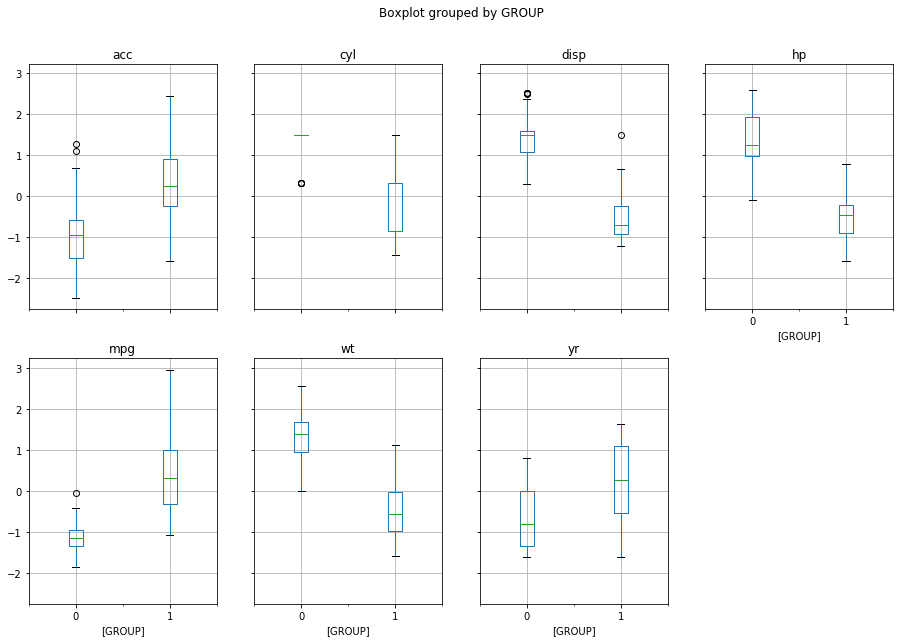

In [67]:
Xscaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

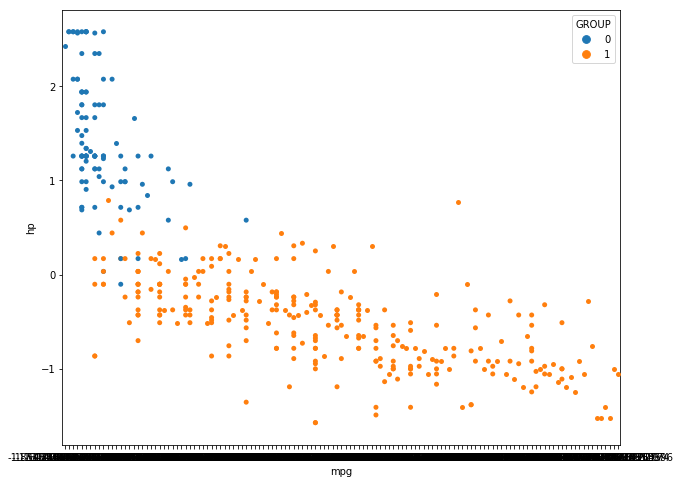

In [68]:
#plotting the clusters
plt.figure(figsize=(10, 8))
sns.stripplot(x="mpg", y="hp", hue="GROUP",data=Xscaled);

## Hierarchical clustering

## • Share your insights about the difference in using these two methods.

For Hirerachical clustering we can cut the dendogram and find the number of clusters .Cutting the dendogram at level 1 in 2 parts was enough to make the clusters .We could have cut it at level 2 also still it doesn't make a huge difference so keeping 2 clusters only. 

For using K means Clustering we need pre-specified  number of clusters which we have found by using Elbow technique. we can observe 2 sharp cuts resulting in 2 clusters in case ok K means .

K-means gave us a better way of data cluster while comparing to Hirerachical clustering .

## 5. Answer below questions based on outcomes of using ML based methods.

• Mention how many optimal clusters are present in the data and what could be the possible reason behind it.

In [69]:
XScaled.clusters_H.value_counts().sort_index()

1     99
2    299
Name: clusters_H, dtype: int64

In [70]:
Xscaled.GROUP.value_counts().sort_index()

0    105
1    293
Name: GROUP, dtype: int64

In [71]:
XScaled.shape

(398, 8)

In [72]:
Xscaled.shape

(398, 8)

## • Use linear regression model on different clusters separately  And print the coefficients of the models individually

In [73]:
data.head(2)

,acc,cyl,disp,hp,mpg,wt,yr,origin_america,origin_asia,origin_europe,mpg_level_high,mpg_level_low,mpg_level_medium
0,12.0,8,307.0,130.0,18.0,3504,70,1,0,0,0,0,1
1,11.5,8,350.0,165.0,15.0,3693,70,1,0,0,0,1,0


In [74]:
X = data.drop(['mpg','origin_europe','mpg_level_low'], axis=1)
# the dependent variable
y = data[['mpg']]

In [75]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=15)

In [76]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [77]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for acc is 0.19183425608860305
The coefficient for cyl is -0.5134441386218298
The coefficient for disp is 0.010688858394646384
The coefficient for hp is 0.010315514536311963
The coefficient for wt is -0.0045387885687370585
The coefficient for yr is 0.4434650429116815
The coefficient for origin_america is -1.7306209513689017
The coefficient for origin_asia is -0.8976724344009379
The coefficient for mpg_level_high is 8.552374663817032
The coefficient for mpg_level_medium is 1.5941218694850456


In [78]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1.663571756864851


In [79]:
regression_model.score(X_train, y_train)

0.8967703023839786

In [80]:
O=regression_model.score(X_test, y_test)
O

0.9037421476349178

Observation : Our test(90%) and train(89%) both results are performing well ,in case we haven't created dummies variable it would have given less test and train score percentge(80%) . So, all the data present are important .

## • How using different models for different clusters will be helpful in this case and how it will be different than using one single model without clustering? Mention how it impacts performance and prediction.

#### Linear regression on data with K means cluster

In [81]:
data.head()

,acc,cyl,disp,hp,mpg,wt,yr,origin_america,origin_asia,origin_europe,mpg_level_high,mpg_level_low,mpg_level_medium
0,12.0,8,307.0,130.0,18.0,3504,70,1,0,0,0,0,1
1,11.5,8,350.0,165.0,15.0,3693,70,1,0,0,0,1,0
2,11.0,8,318.0,150.0,18.0,3436,70,1,0,0,0,0,1
3,12.0,8,304.0,150.0,16.0,3433,70,1,0,0,0,1,0
4,10.5,8,302.0,140.0,17.0,3449,70,1,0,0,0,0,1


In [82]:
#renaming the cluster labels to light and heavy vehicles and creating dummy variables of it
carK['GROUP']=carK['GROUP'].astype('category')
carK['GROUP'] = carK['GROUP'].replace({1: 'heavy', 0: 'light'})
carK = pd.get_dummies(carK, columns=['GROUP'])

In [83]:
carK.head()

,acc,cyl,disp,hp,mpg,wt,yr,origin_america,origin_asia,origin_europe,mpg_level_high,mpg_level_low,mpg_level_medium,GROUP_heavy,GROUP_light
0,12.0,8,307.0,130.0,18.0,3504,70,1,0,0,0,0,1,0,1
1,11.5,8,350.0,165.0,15.0,3693,70,1,0,0,0,1,0,0,1
2,11.0,8,318.0,150.0,18.0,3436,70,1,0,0,0,0,1,0,1
3,12.0,8,304.0,150.0,16.0,3433,70,1,0,0,0,1,0,0,1
4,10.5,8,302.0,140.0,17.0,3449,70,1,0,0,0,0,1,0,1


In [84]:
X = carK.drop(['mpg','origin_europe','mpg_level_low','GROUP_light'], axis=1)
# the dependent variable
y = carK[['mpg']]

In [85]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12)

In [86]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [87]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for acc is 0.18564828746244927
The coefficient for cyl is -1.1945995644779792
The coefficient for disp is 0.017477496279110473
The coefficient for hp is -0.01013804583590907
The coefficient for wt is -0.004068430169386348
The coefficient for yr is 0.4318651041505952
The coefficient for origin_america is -1.6918315494304021
The coefficient for origin_asia is -0.7407779192303044
The coefficient for mpg_level_high is 9.283120939156872
The coefficient for mpg_level_medium is 2.250001714231238
The coefficient for GROUP_heavy is -2.5115140143384718


In [88]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 3.7156608210580018


In [89]:
regression_model.score(X_train, y_train)

0.8942370456543635

In [90]:
K=regression_model.score(X_test, y_test)
K

0.9117893808052395

#### Linear regression on data with H-clusters

In [91]:
#renaming the cluster labels to light and heavy vehicles and creating summy variable of it
carH['clusters_H']=carH['clusters_H'].astype('category')
carH['clusters_H'] = carH['clusters_H'].replace({1: 'heavy', 2: 'light'})
carH = pd.get_dummies(carH, columns=['clusters_H'])

In [92]:
X = carH.drop(['mpg','origin_europe','mpg_level_low','clusters_H_light'], axis=1)
# the dependent variable
y = carH[['mpg']]

In [93]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [94]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [95]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for acc is 0.1271004853856109
The coefficient for cyl is -1.0563558514622342
The coefficient for disp is 0.014742610586278203
The coefficient for hp is -0.012073029112257374
The coefficient for wt is -0.004263720024449094
The coefficient for yr is 0.449948579053035
The coefficient for origin_america is -2.082043504509785
The coefficient for origin_asia is -1.3956899932246478
The coefficient for mpg_level_high is 8.661941066379015
The coefficient for mpg_level_medium is 1.7777428220028437
The coefficient for clusters_H_heavy is 2.3437215529156203


In [96]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 2.2607154376281358


In [97]:
regression_model.score(X_train, y_train)

0.8994828537771579

In [98]:
H=regression_model.score(X_test, y_test)
H

0.9008374723733148

In [99]:
modellists = []
modellists.append(['Linear Regression on Original Data set', O*100])
modellists.append(['Linear Regression with K means clusters', K*100])
modellists.append(['Linear Regression with Heirarchical clusters', H*100])
mdl_df = pd.DataFrame(modellists, columns = ['Model','r^2 on Test'])
mdl_df

,Model,r^2 on Test
0,Linear Regression on Original Data set,90.374215
1,Linear Regression with K means clusters,91.178938
2,Linear Regression with Heirarchical clusters,90.083747


## Improvisation: 
• Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the company to
perform a better data analysis in future.

K-means appears to explain the highest variation in the datset, but with a difference of only 1% when compared with other models, to get more clarity a larger dataset may be used, since this is a dataset of used cars it doesn't give us how many previous owners has the cars seen which might be helful variable,the gender of the previous owners, the reason/purpose that the cars were being used is also an important factor which the dataset doen't capture. With the above mentioned features it may be possible to get a higher accuracy or explainability of the models and its variables.